### Importation des librairies nécessaires


In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Exploration Générale

In [42]:
# Charger le dataset
df = pd.read_csv('recettes.csv')

In [43]:
# Afficher les premières lignes du DataFrame
df.head()

,nom_de_recette,type_de_recette,type_du_plat,ingredients,ustensiles,nombre_de_personnes,difficulte,budget,temps_de_preparation,etapes,score,similaire,nbre_de_commentaires,commentaires
0,Wrap au chèvre croustillant,Apéritif ou buffet,Amuse-bouche au fromage,"[{'quantite': '1', 'unite': '', 'nom': 'yaourt...","[{'quantite': '1', 'nom': 'balance de cuisine'...",1.0,très facile,bon marché,"{'total': '20 min', 'prepartion': '10 min', 'r...","{'Étape 1': {'ingredients': [], 'description':...",5/5,"Wrap au poulet,Wraps au thon,Wraps sucrés,Wrap...",3,"[{'commentaire': ""C'est ma fille qui a fait so..."
1,apéritif 'maison'comme au restaurant chinois,Apéritif ou buffet,Cocktail apéritif,"[{'quantite': '1', 'unite': 'boîte', 'nom': 'l...","[{'quantite': '1', 'nom': 'chinois'}, {'quanti...",10.0,très facile,bon marché,"{'total': '5 min', 'prepartion': '5 min', 'rep...","{'Étape 1': {'ingredients': [], 'description':...",4.7/5,"Dessert chinois au maïs,Raviolis chinois,Quich...",3,"[{'commentaire': ""Vraiment très bon, pas trop ..."
2,Verrine d'automne,Apéritif ou buffet,Verrine,"[{'quantite': '4', 'unite': 'c.à.s', 'nom': 'c...","[{'quantite': '1', 'nom': 'Lot de verrines'}, ...",5.0,facile,bon marché,"{'total': '45 min', 'prepartion': '30 min', 'r...","{'Étape 1': {'ingredients': ['potimarron'], 'd...",4/5,"tarte d'automne,Gâteau automnal,Salade d'autom...",6,"[{'commentaire': ""C'était très bon. Une verrin..."
3,Chips de kale,Apéritif ou buffet,Chips,"[{'quantite': None, 'unite': None, 'nom': ""hui...","[{'quantite': '1', 'nom': 'Four'}, {'quantite'...",4.0,facile,bon marché,"{'total': '30 min', 'prepartion': '10 min', 'r...","{'Étape 1': {'ingredients': [], 'description':...",4.9/5,"Chips de legumes au four,Chips de patates douc...",23,"[{'commentaire': ""Parfait pour un apéro diétét..."
4,St-Germain Spritz,Apéritif ou buffet,Spritz,"[{'quantite': '6', 'unite': 'cl', 'nom': 'MART...",NaN,1.0,très facile,moyen,"{'total': '-', 'prepartion': None, 'repos': No...","{'Étape 1': {'ingredients': ['glaçons'], 'desc...",5/5,"Gâteau aux pommes de Marie Germaine,Spritz aux...",1,"[{'commentaire': 'Très bon et très frais', 'no..."


In [81]:
# Infos sur le dataset (types de données, valeurs manquantes)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37281 entries, 0 to 37280
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   nom_de_recette        37281 non-null  object 
 1   type_de_recette       37281 non-null  object 
 2   type_du_plat          37281 non-null  object 
 3   ingredients           37277 non-null  object 
 4   ustensiles            36539 non-null  object 
 5   nombre_de_personnes   37261 non-null  float64
 6   difficulte            37281 non-null  object 
 7   budget                37281 non-null  object 
 8   temps_de_preparation  37281 non-null  object 
 9   etapes                37281 non-null  object 
 10  score                 37281 non-null  object 
 11  similaire             37180 non-null  object 
 12  nbre_de_commentaires  37281 non-null  int64  
 13  commentaires          28917 non-null  object 
 14  score_sur_5           37281 non-null  float64
dtypes: float64(2), int6

In [45]:
# Explorer les valeurs manquantes
print(df.isnull().sum())

nom_de_recette             0
type_de_recette            0
type_du_plat               0
ingredients                4
ustensiles               742
nombre_de_personnes       20
difficulte                 0
budget                     0
temps_de_preparation       0
etapes                     0
score                      0
similaire                101
nbre_de_commentaires       0
commentaires            8364
dtype: int64


In [46]:
# Statistiques descriptives
df.describe()

,nombre_de_personnes,nbre_de_commentaires
count,37261.000000,37281.000000
mean,8.653606,14.767388
std,452.411904,68.696935
min,1.000000,0.000000
25%,4.000000,1.000000
50%,4.000000,3.000000
75%,6.000000,9.000000
max,87108.000000,3283.000000


### Exploration par Colonne et Prétraitement

#### Nom de recette

In [73]:
# Transformer la colonne 'nom_de_recette' en minuscules
df['nom_de_recette'] = df['nom_de_recette'].astype(str).str.lower()

# Afficher les premières lignes du DataFrame avec la colonne transformée
print(df['nom_de_recette'].head())

0                     wrap au chèvre croustillant
1    apéritif 'maison'comme au restaurant chinois
2                               verrine d'automne
3                                   chips de kale
4                               st-germain spritz
Name: nom_de_recette, dtype: object


In [82]:
print('\nDescription :\n',df['nom_de_recette'].describe())



Description :
 count                37281
unique               37196
top       terrine de lapin
freq                     2
Name: nom_de_recette, dtype: object


In [83]:
non_unique_recipes = df[df.duplicated('nom_de_recette', keep=False)]
num_non_unique_recipes = non_unique_recipes.shape[0]
print("Nombre de 'nom_de_recette' non uniques :", num_non_unique_recipes)

Nombre de 'nom_de_recette' non uniques : 170


In [84]:
print(df['nom_de_recette'].value_counts().head(86))


terrine de lapin                    2
gratin de pâtes au jambon           2
gâteau renversé à l'orange          2
gâteau au citron et au pavot        2
tartiflette facile                  2
                                   ..
poulet au cidre                     2
mousse aux trois chocolats          2
mousse au chocolat au tofu          2
poulet à la crème et champignons    2
clafoutis d'ananas créole           1
Name: nom_de_recette, Length: 86, dtype: int64


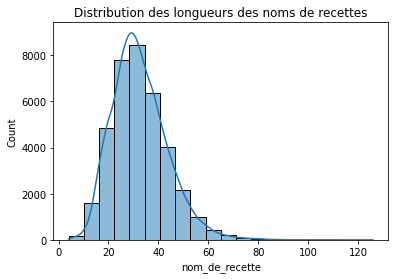

In [78]:
sns.histplot(df['nom_de_recette'].apply(len), bins=20, kde=True)
plt.title('Distribution des longueurs des noms de recettes')
plt.show()


In [79]:
long_names_recipes = df[df['nom_de_recette'].apply(len) > 40]['nom_de_recette']
print("Exemples de recettes avec des noms plus longs :\n", long_names_recipes)

Exemples de recettes avec des noms plus longs :
 1             apéritif 'maison'comme au restaurant chinois
18            côtes de porc aux pommes de terre en cocotte
20       omelette brouillée au saumon et à la crème fra...
22       wok de poulet, courgettes et vermicelles de ri...
27       omelette aux girolles, blé, asperges et auberg...
                               ...                        
37236          verrine au saumon fumé, crème et ciboulette
37238            beignets d'aubergines au coulis de tomate
37249     rillettes de thon au basilic au monsieur cuisine
37259           cake provençal aux tomates et à l'emmental
37277           aperol spritz : cocktail italien pétillant
Name: nom_de_recette, Length: 8023, dtype: object


In [80]:
random_recipes = df['nom_de_recette'].sample(5)
print("Exemples de recettes aléatoires :\n", random_recipes)

Exemples de recettes aléatoires :
 25987    tartelette de fraise à la crème tagada
12788       riz aux merguez et aux pois chiches
31379     crumble aux pommes poire et spéculoos
4025        coquilles saint-jacques à l'oseille
17435                       le burger auvergnat
Name: nom_de_recette, dtype: object


In [87]:
keyword = 'poulet'
recipes_with_keyword = df[df['nom_de_recette'].str.contains(keyword)]
print(f"Recettes contenant '{keyword}':\n", recipes_with_keyword['nom_de_recette'])


Recettes contenant 'poulet':
 6                        wok de poulet au curry et au thym
11                                yassa de poulet moutardé
22       wok de poulet, courgettes et vermicelles de ri...
48            courgettes farcies au poulet et au camembert
54               courgettes et émincé de poulet à la crème
                               ...                        
36812    verrine du soleil (courgettes, poulet, curry, ...
36859              cake poulet, chèvre et tomates confites
36911                     cake au poulet et à la courgette
37025                     rillettes de poulet à l'ancienne
37066                                 chaussons au poulet 
Name: nom_de_recette, Length: 2111, dtype: object


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MSI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


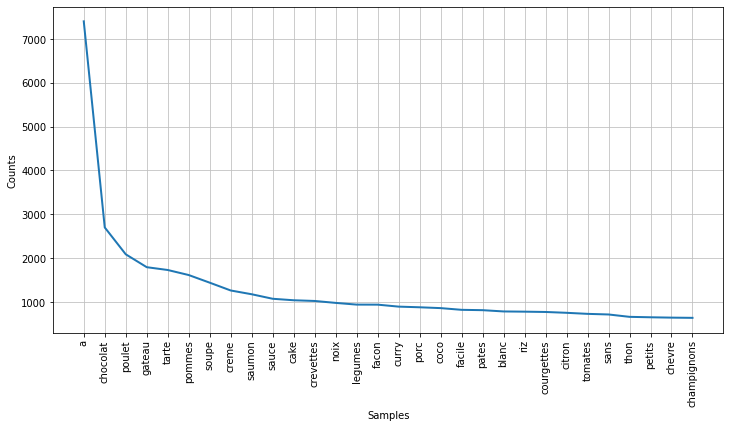

In [95]:
import nltk
from nltk import FreqDist
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from unidecode import unidecode

# Fonction pour retirer les accents
def remove_accents(input_str):
    return unidecode(input_str)

# Appliquer la fonction pour retirer les accents sur la colonne 'nom_de_recette'
df['nom_de_recette_cleaned'] = df['nom_de_recette'].apply(remove_accents)

# Télécharger les ressources nécessaires pour NLTK (si ce n'est pas déjà fait)
nltk.download('stopwords')

# Concaténer tous les noms de recettes en une seule chaîne
all_recipe_names = ' '.join(df['nom_de_recette_cleaned'])

# Tokenization des mots
words = nltk.word_tokenize(all_recipe_names)

# Supprimer les mots vides (stopwords)
stop_words = set(stopwords.words('french'))  # Utilisez 'english' si les noms de recettes sont en anglais
filtered_words = [word.lower() for word in words if word.isalnum() and word.lower() not in stop_words]

# Calculer la fréquence des mots
word_freq = FreqDist(filtered_words)

# # Afficher les mots les plus fréquents dans un graphique
plt.figure(figsize=(12, 6))
word_freq.plot(30, cumulative=False)
plt.show()


In [ ]:
# frequent words
# delete duplicates
# accent, stopwords

#### autres

In [47]:
# Explorer la distribution des valeurs dans une colonne particulière
df['nombre_de_personnes'].value_counts()

4.0      15122
6.0       9583
2.0       3476
8.0       3472
1.0       1064
         ...  
65.0         1
910.0        1
55.0         1
88.0         1
125.0        1
Name: nombre_de_personnes, Length: 64, dtype: int64

In [48]:
# Explorer les catégories uniques dans une colonne (par exemple, type_de_recette)
print(df['type_de_recette'].unique())

['Apéritif ou buffet' 'Plat principal' 'Dessert' 'Entrée']


In [49]:
# Explorer les valeurs uniques dans la colonne 'difficulte'
print(df['difficulte'].value_counts())

facile         17670
très facile    16485
moyenne         2928
difficile        198
Name: difficulte, dtype: int64


In [50]:
# Créer la colonne 'score_sur_5' en extrayant la partie entière du score
df['score_sur_5'] = df['score'].apply(lambda x: float(x.split('/')[0]))

In [51]:
# Explorer les commentaires
print(df['commentaires'][0])

[{'commentaire': "C'est ma fille qui a fait son premier wrap. On n'avait pas tous les ingrédients, mais elle s'est débrouillée et on a adoré toutes les deux. On va refaire avec du poulet.", 'note': 5}, {'commentaire': 'Bonjour merci et excellent appétit !', 'note': 5}, {'commentaire': 'Un petit conseil si vous voulez faire cette recette : remplacer le Rocamadour ou Cabécou par du crottin de chèvre. Délicieux !', 'note': 5}]


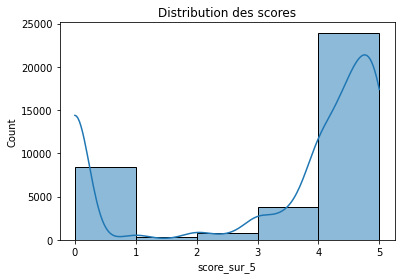

In [52]:
# Visualiser la distribution des notes (score)
sns.histplot(df['score_sur_5'], bins=5, kde=True)
plt.title('Distribution des scores')
plt.show()

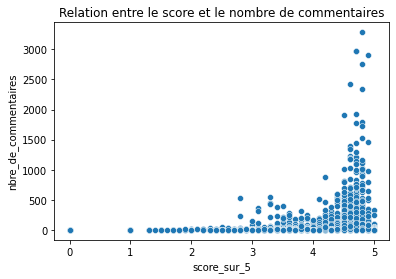

In [53]:
# Explorer la relation entre certaines variables (par exemple, score et nombre_de_commentaires)
sns.scatterplot(x='score_sur_5', y='nbre_de_commentaires', data=df)
plt.title('Relation entre le score et le nombre de commentaires')
plt.show()